# Árboles de decisión

Los árboles de decisión se utilizan para realizar tanto tareas de clasificación como de regresión. Un árbol de decisión toma decisiones al dividir los datos en subconjuntos basados en los valores de las características, de forma recursiva.

## Componentes de un Árbol de Decisión

- **Nodos de decisión**: Representan una característica de los datos que se utiliza para dividir el conjunto de datos.
- **Ramas**: Representan el resultado de una decisión, llevando a otros nodos de decisión o a nodos hoja.
- **Nodos hoja**: Representan la clase o el valor de predicción para los datos.

## Construcción de un Árbol de Decisión

1. **Selección de la mejor característica**: Se utiliza una medida de pureza como el Gini, la entropía o la reducción de varianza (para regresión) para seleccionar la característica que mejor divide los datos.
2. **División del conjunto de datos**: Los datos se dividen en subconjuntos basados en el valor de la característica seleccionada.
3. **Repetición del proceso**: El proceso se repite recursivamente para cada subconjunto hasta que se cumpla un criterio de parada, como una profundidad máxima del árbol o un número mínimo de muestras en un nodo.

### Suposiciones y Consideraciones

- **No linealidad**: Los árboles de decisión no asumen ninguna relación lineal entre las variables independientes y la variable dependiente.
- **Independencia de las observaciones**: Las observaciones deben ser independientes entre sí.
- **No multicolinealidad**: Los árboles de decisión no se ven afectados por la multicolinealidad.

### Ventajas y Desventajas

- **Ventajas**:
  - Fácil de entender e interpretar.
  - Requiere poca preparación de los datos.
  - Puede manejar datos numéricos y categóricos.
  - Capaz de capturar relaciones no lineales.

- **Desventajas**:
  - Propenso al sobreajuste.
  - Sensible a pequeños cambios en los datos.
  - Menos preciso que otros modelos cuando se utiliza solo.

### Métricas de Evaluación para Árboles de Decisión

| Métrica             | Qué Mide                                                           | Interpretación                                   | Cuándo Usarla                                                     | Cuándo No Usarla                                          |
|---------------------|--------------------------------------------------------------------|--------------------------------------------------|-------------------------------------------------------------------|-----------------------------------------------------------|
| Accuracy            | Proporción de predicciones correctas                              | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento general del modelo                          | Cuando las clases están desbalanceadas                    |
| Precision           | Proporción de verdaderos positivos entre los predichos como positivos | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento en problemas donde el costo de falsos positivos es alto | Cuando necesitas evaluar la capacidad del modelo para detectar todos los positivos |
| Recall (Sensibilidad)| Proporción de verdaderos positivos entre todos los reales positivos| Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el rendimiento en problemas donde el costo de falsos negativos es alto | Cuando necesitas evaluar la capacidad del modelo para evitar falsos positivos |
| F1 Score            | Media armónica de precision y recall                              | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar el equilibrio entre precision y recall                    | Cuando las clases están desbalanceadas o se prefiere una métrica unidimensional |
| AUC-ROC             | Área bajo la curva ROC (Receiver Operating Characteristic)        | Valor entre 0 y 1, donde 1 es perfecto           | Evaluar la capacidad del modelo para distinguir entre clases      | Cuando necesitas una métrica interpretable de manera directa y unidimensional |
| Log-Loss            | Logaritmo de la función de pérdida                                | Valor más bajo es mejor                          | Evaluar la incertidumbre de las predicciones probabilísticas       | Cuando se prefieren métricas más interpretables como Accuracy |
| Gini Impurity       | Medida de la pureza de los nodos                                  | Valor más bajo indica nodos más puros            | Seleccionar características y evaluar la calidad de las divisiones | Interpretación menos intuitiva comparada con otras métricas|
| Entropía            | Medida de la incertidumbre de los nodos                           | Valor más bajo indica nodos más puros            | Seleccionar características y evaluar la calidad de las divisiones | Interpretación menos intuitiva comparada con otras métricas|



-----------

# Ejercicio de ejemplo práctico (usando el dataset del titanic)

Uso todo el código anterior hasta el train/test split

In [1]:
import pandas as pd
df = pd.read_csv('./titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Más info de las columnas:

- SibSp: hermanos y matrimonios
- Parch: padres e hijos

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

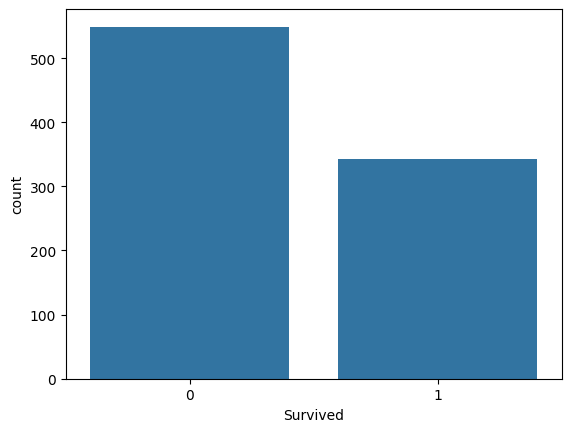

In [4]:
import seaborn as sb
sb.countplot (x = 'Survived', data= df)

<Axes: xlabel='Survived', ylabel='count'>

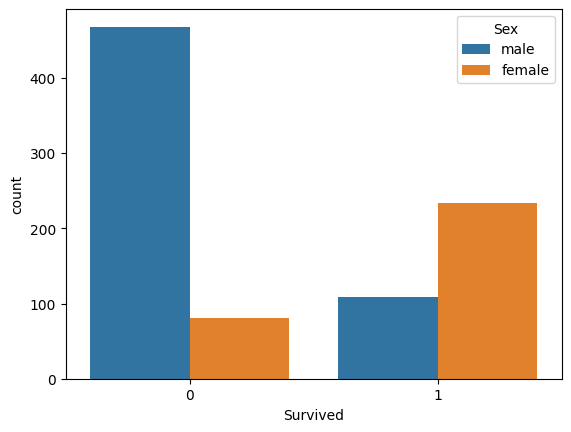

In [5]:
import seaborn as sb
sb.countplot (x = 'Survived', data= df, hue='Sex')

### Manejar los valores faltantes

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Voy a rellenar los valores faltantes de Age con la media de los datos, la columna de Cabin la voy a eliminar porque no son datos relevantes y los 2 faltante de Embarked los voy a eliminar.

Comienzo por Age:

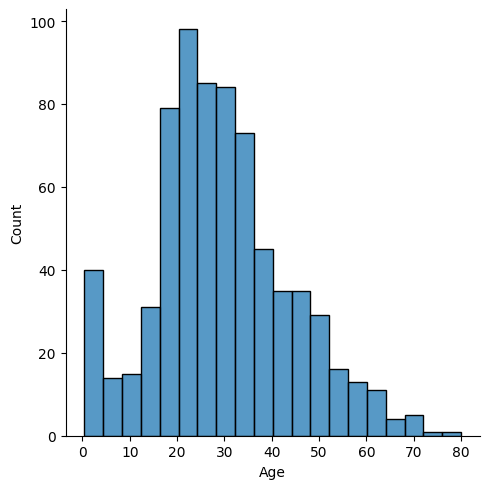

In [7]:
sb.displot(x='Age', data=df)

In [8]:
df['Age'].mean()

29.69911764705882

In [9]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Listo, ahora borro la columna de Cabin:

In [12]:
df = df.drop(['Cabin'], axis=1)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Listo, ahora borro los dos datos faltantes de Embarked:

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Borrar columnas que no voy a necesitar

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df = df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Convertir Sex en numérica


In [19]:
dummies_sex = pd.get_dummies(df['Sex'], dtype= int, drop_first =True)
# drop_first =True se utiliza para evitar la redundancia y la multicolinealidad, porque si 1 es hombre, 0 es lo contrario a hombre, es decir, mujer. No hace falta tener 2 columnas.
dummies_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


Lo agregamos al conjunto de datos:

In [20]:
df = df.join(dummies_sex)

Borro la columa de Sex que ya no me hace falta:

In [21]:
df = df.drop(['Sex'], axis = 1)

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


## Vemos qué hacemos con la columna de Embarked

<Axes: xlabel='Survived', ylabel='count'>

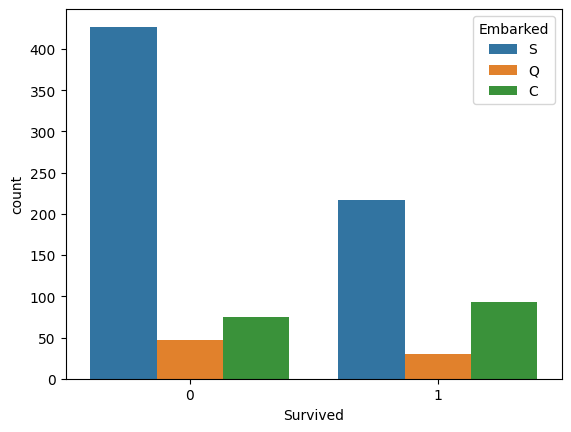

In [23]:
sb.countplot(x='Survived', data = df, hue ='Embarked')

In [24]:
dummies_embarked= pd.get_dummies(df['Embarked'], dtype= int, drop_first =True)

In [25]:
df = df.join(dummies_embarked)
df = df.drop(['Embarked'], axis = 1)

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Correlación entre las variables

<Axes: >

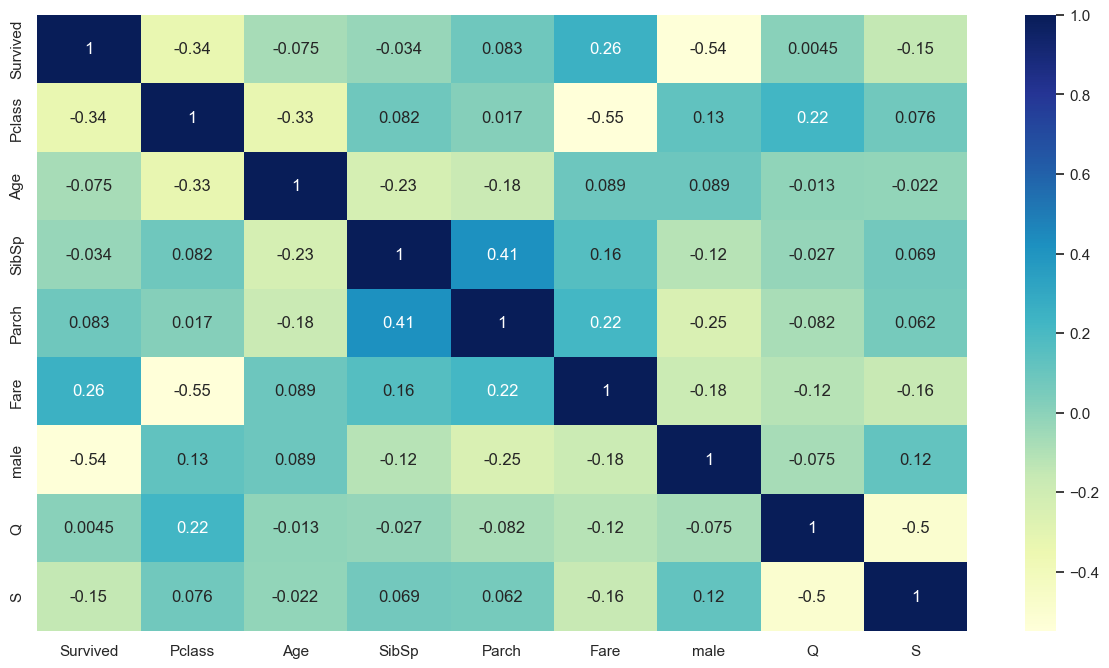

In [27]:
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(df.corr(), annot=True, cmap = "YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

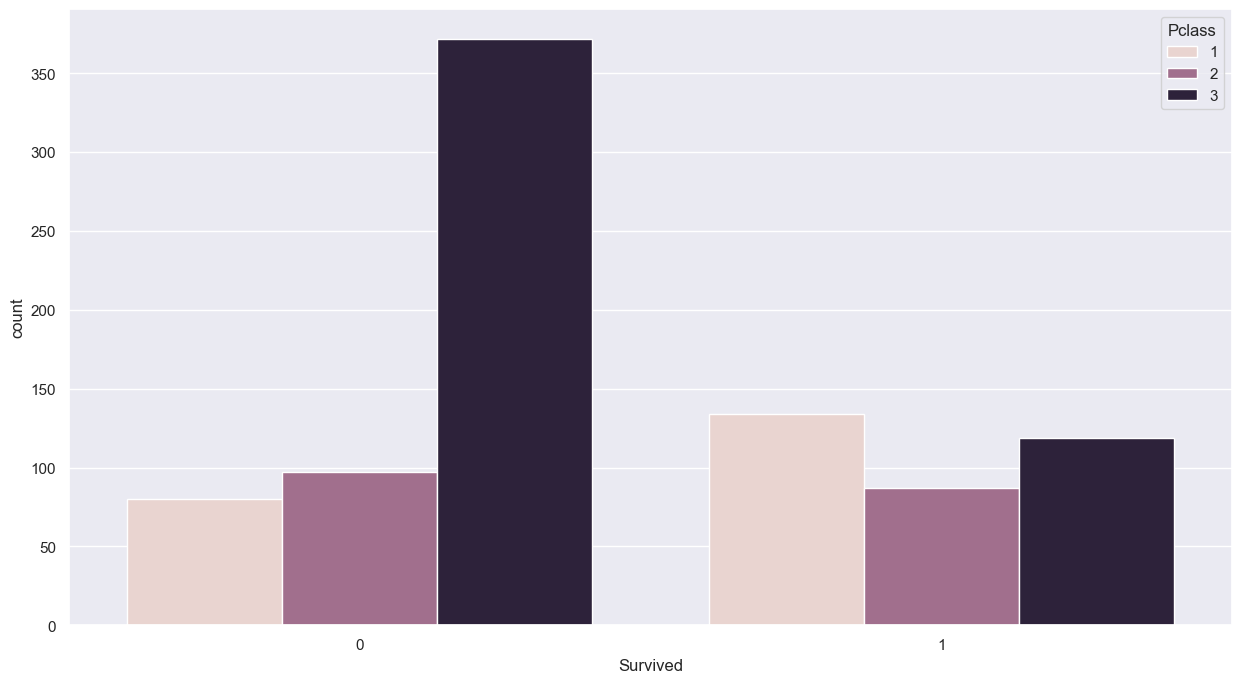

In [28]:
sb.countplot(x='Survived', data = df, hue='Pclass')

## Separación de X e y

In [29]:
X = df.drop(['Survived'], axis=1 )
y = df['Survived']

## Separación en train y test

In [30]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X,y, test_size = .2)

## Entrenar el modelo

In [31]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50) # max_depth es la profundidad del árbol que hay que tenerla en cuenta porque cuanto más profunda predice mejor pero si es demasiado profunda puede haber un sobreajuste
modelo.fit(X_ent,y_ent)
predicciones = modelo.predict(X_pru)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7808988764044944

Mejoró un poco en comparación con la regresión logística (0.75). Sin embargo, podemos hacer esto para que, en lugar de ir probando números al tuntún, como el 50, lo hagamos del tirón:

In [35]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent,y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones)
    print(f'Resultado para {i}: {exactitud}')
    resultados.append(exactitud)

Resultado para 1: 0.8426966292134831
Resultado para 2: 0.7808988764044944
Resultado para 3: 0.8426966292134831
Resultado para 4: 0.8426966292134831
Resultado para 5: 0.8258426966292135
Resultado para 6: 0.7696629213483146
Resultado para 7: 0.7752808988764045
Resultado para 8: 0.7808988764044944
Resultado para 9: 0.7808988764044944
Resultado para 10: 0.7865168539325843
Resultado para 11: 0.7752808988764045
Resultado para 12: 0.7752808988764045
Resultado para 13: 0.7584269662921348
Resultado para 14: 0.7584269662921348


<Axes: >

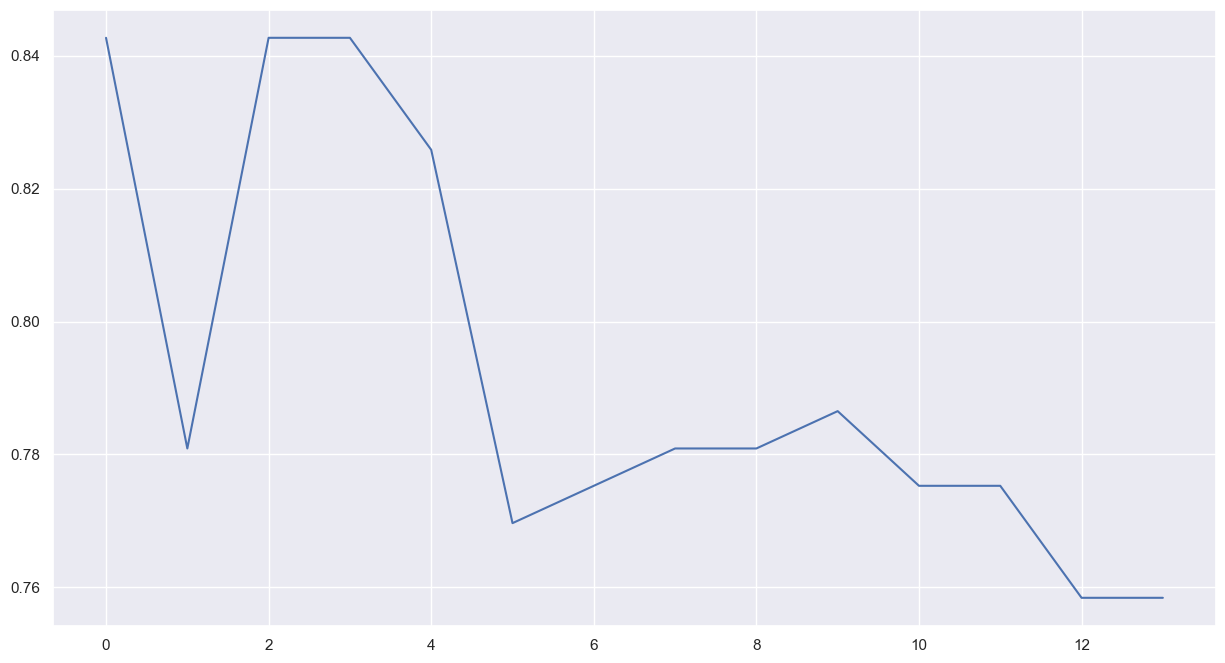

In [36]:
sb.lineplot(data=resultados)

In [37]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3) # cojo el 3 porque es de los mejores resultados
modelo.fit(X_ent,y_ent)
predicciones = modelo.predict(X_pru)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8426966292134831

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_pru,predicciones))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       117
           1       0.84      0.67      0.75        61

    accuracy                           0.84       178
   macro avg       0.84      0.80      0.82       178
weighted avg       0.84      0.84      0.84       178



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[109,   8],
       [ 20,  41]])

In [41]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns= ['Pred: No', 'Pred: Sí'], index=['Real: No', 'Real:Sí'])

,Pred: No,Pred: Sí
Real: No,109,8
Real:Sí,20,41


##  Podemos graficar el árbol

[Text(0.5, 0.875, 'male <= 0.5\n0.477\n711\n[432, 279]\nMurió'),
 Text(0.25, 0.625, 'Pclass <= 2.5\n0.396\n257\n[70, 187]\nVivió'),
 Text(0.125, 0.375, 'Age <= 2.5\n0.084\n137\n[6, 131]\nVivió'),
 Text(0.0625, 0.125, '0.5\n2\n[1, 1]\nMurió'),
 Text(0.1875, 0.125, '0.071\n135\n[5, 130]\nVivió'),
 Text(0.375, 0.375, 'Fare <= 20.8\n0.498\n120\n[64, 56]\nMurió'),
 Text(0.3125, 0.125, '0.493\n95\n[42.0, 53.0]\nVivió'),
 Text(0.4375, 0.125, '0.211\n25\n[22, 3]\nMurió'),
 Text(0.75, 0.625, 'Age <= 6.5\n0.323\n454\n[362, 92]\nMurió'),
 Text(0.625, 0.375, 'SibSp <= 3.0\n0.332\n19\n[4, 15]\nVivió'),
 Text(0.5625, 0.125, '0.0\n14\n[0, 14]\nVivió'),
 Text(0.6875, 0.125, '0.32\n5\n[4, 1]\nMurió'),
 Text(0.875, 0.375, 'Fare <= 26.269\n0.291\n435\n[358, 77]\nMurió'),
 Text(0.8125, 0.125, '0.204\n321\n[284, 37]\nMurió'),
 Text(0.9375, 0.125, '0.456\n114\n[74, 40]\nMurió')]

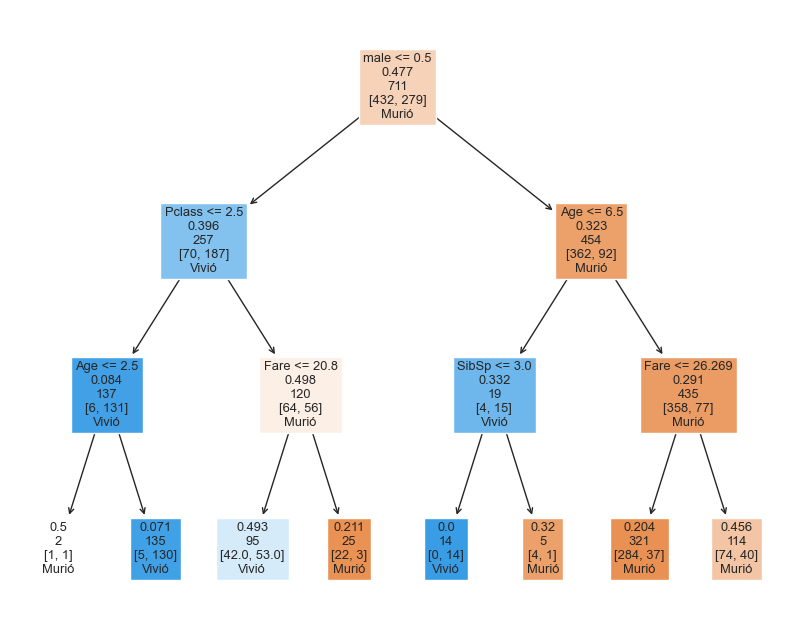

In [45]:
from sklearn. tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(
    modelo,
    feature_names = X_ent.columns,
    class_names=['Murió','Vivió'],
    filled=True,
    label='none'
)